In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit
import shapely
import tabs

/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

In [3]:
df = pd.read_csv('../../../../data/HRRO3 March 25-27 2018/SCS_ Pelican/SAMOS/SAMOS_OBS_001.elg', parse_dates=[[0,1]], index_col=0, na_values='na', nrows=95000)

In [4]:
#convert from shoved together numbers to decimal degrees by pulling apart number as a string
# df.loc[:,'SAMOS_LAT-DRV-VALUE'] = [float(str(la)[:2]) + float(str(la)[2:-1])/60 for la in df['SAMOS_LAT-DRV-VALUE']]
# #and again for longitude
# df.loc[:,'SAMOS-LON-DRV-VALUE'] = [-(float(str(lo)[1:3]) + float(str(lo)[3:-1])/60) for lo in df['SAMOS-LON-DRV-VALUE']]

In [5]:
tdf = tabs.read('g06010', '2018-3-25', '2018-3-27') #g06010 bouy

# Figure without Galveston Bay 

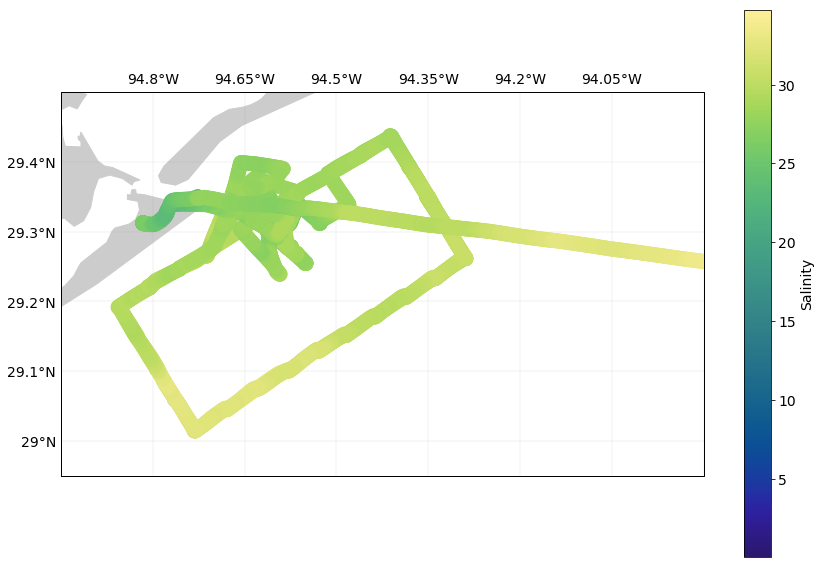

In [26]:
# Figure without Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -93.9, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['SAMOS-LON-DRV-VALUE'], df['SAMOS_LAT-DRV-VALUE'], c=df['SAMOS-TSGS-DRV-VALUE'], s=200, cmap=cmo.haline, transform=pc, zorder=10)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

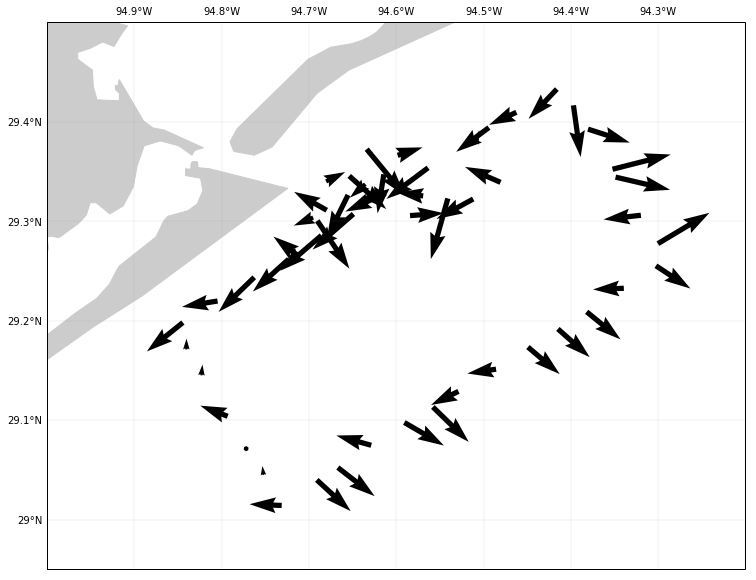

In [34]:
# first flood tide 
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

dd = 20

mappable = ax.quiver(df['SAMOS-LON-DRV-VALUE']['2018-3-25 14:30':'2018-3-26 07:30'].values[::dd], df['SAMOS_LAT-DRV-VALUE']['2018-3-25 14:30':'2018-3-26 07:30'].values[::dd], df['East [m/s]']['2018-3-25 14:30':'2018-3-26 07:30'].values[::dd], df['North [m/s]']['2018-3-25 14:30':'2018-3-26 07:30'].values[::dd], transform=pc)


In [13]:
theta = 90 - (df['SAMOS-RWDIR-DRV-VALUE'] - 180) 
theta[theta<0] += 360
df['East [m/s]'] = df['SAMOS-RWSPD-DRV-VALUE']*np.cos(np.deg2rad(theta)) 
df['North [m/s]'] = df['SAMOS-RWSPD-DRV-VALUE']*np.sin(np.deg2rad(theta))

In [21]:
df['SAMOS-LON-DRV-VALUE']['2018-3-25 14:30':'2018-3-26 07:30'].values

array([-94.58426, -94.5841 , -94.58418, ..., -94.61926, -94.61676,
       -94.61427])

In [14]:
df

,SAMOS_LAT-DRV-VALUE,SAMOS-LON-DRV-VALUE,SAMOS-GYRO-DRV-VALUE,SAMOS-SOG-DRV-VALUE,SAMOS-COG-DRV-VALUE,SAMOS-ATEMP-DRV-VALUE,SAMOS-BARO-DRV-VALUE,SAMOS-RELH-DRV-VALUE,SAMOS-RWSPD-DRV-VALUE,SAMOS-RWDIR-DRV-VALUE,SAMOS-TWSPD-DRV-VALUE,SAMOS-TWDIR-DRV-VALUE,SAMOS-TSGWT-DRV-VALUE,SAMOS-TSGS-DRV-VALUE,SAMOS-TSGC-DRV-VALUE,SAMOS-TSGSV-DRV-VALUE,Unnamed: 18,East [m/s],North [m/s]
Date_Time,,,,,,,,,,,,,,,,,,,
2018-03-25 04:25:45,29.31227,-94.81576,94.13,0.02,0.00,20.89,1012.13,93.61,10.31,78.03,10.33,172.15,19.434,0.010,0.00,1480.62,NaN,-10.085823,-2.138289
2018-03-25 04:26:45,29.31227,-94.81576,94.09,0.02,0.00,20.90,1012.13,93.62,11.36,76.36,11.37,171.17,19.431,0.010,0.00,1480.61,NaN,-11.039609,-2.678922
2018-03-25 04:27:45,29.31227,-94.81576,94.14,0.02,0.29,20.91,1012.16,93.62,13.89,79.82,13.87,174.12,19.428,0.010,0.00,1480.60,NaN,-13.671335,-2.454935
2018-03-25 04:28:45,29.31227,-94.81576,94.16,0.02,0.33,20.90,1012.11,93.61,11.96,78.14,11.93,172.17,19.424,0.010,0.00,1480.59,NaN,-11.704686,-2.458031
2018-03-25 04:29:45,29.31227,-94.81576,94.13,0.02,0.08,20.89,1012.12,93.59,11.59,74.03,11.64,168.15,19.421,0.010,0.00,1480.58,NaN,-11.142694,-3.188803
2018-03-25 04:30:45,29.31227,-94.81576,94.07,0.02,0.10,20.90,1012.10,93.57,10.95,74.91,10.99,169.32,19.416,0.010,0.00,1480.56,NaN,-10.572423,-2.850679
2018-03-25 04:31:45,29.31227,-94.81576,94.08,0.02,0.00,20.91,1012.09,93.58,11.46,75.69,11.52,169.77,19.411,0.010,0.00,1480.55,NaN,-11.104426,-2.832547
2018-03-25 04:32:45,29.31227,-94.81576,94.15,0.02,0.18,20.90,1012.09,93.58,12.97,75.24,13.01,169.76,19.406,0.010,0.00,1480.53,NaN,-12.542009,-3.304376
2018-03-25 04:33:45,29.31227,-94.81576,94.17,0.02,0.07,20.90,1012.03,93.60,11.06,77.95,11.12,172.10,19.400,0.010,0.00,1480.51,NaN,-10.816302,-2.308943
